In [1]:
insertion_positions = {'ins1':[3667131,-1,3596622,-1], 'ins2':[607765,1,590472,1], 'ins3':[4598908,-1,4588142,-1],
                      'ins4':[4430713,-1,4415712,-1], 'ins7':[1675626,1,1652821,1], 'ins37':[16976,-1,16974,-1],
                      'ins44':[3543557,-1,3472222,-1],'ins46':[607814,-1,588496,-1],'ins57':[2020327,1,'-','-'],
                      'ins59':[4598908,-1,4588142,-1], 'ins60':[1492144,-1,1462253,-1], 'ins61':[1020695,-1,1037786,-1],
                      'ins63':[3604486,-1,3535174,-1], 'ins1-Pauline':[4430713,-1,4415712,-1],'ins2-Pauline':[607765,1,590472,1],
                      'ins4-Pauline':[3578387,1,3509840,1], 'ins5-Pauline':[66329,-1,'-','-'],'ins7-Pauline':[861262,-1,853814,-1],
                      'ins10-Pauline':[2219464,1,2170661,1]}

In [2]:
unique_insertion_positions = {'ins3':[4598908,-1,4588142,-1], 'ins4':[4430713,-1,4415712,-1],'ins1':[3667131,-1,3596622,-1], 
                               'ins63':[3604486,-1,3535174,-1], 'ins4-Pauline':[3578387,1,3509840,1],
                              'ins44':[3543557,-1,3472222,-1], 'ins10-Pauline':[2219464,1,2170661,1], 'ins57':[2020327,1,'-','-'],
                              'ins7':[1675626,1,1652821,1],'ins60':[1492144,-1,1462253,-1],'ins61':[1020695,-1,1037786,-1],
                              'ins7-Pauline':[861262,-1,853814,-1],'ins46':[607814,-1,588496,-1],
                                'ins2':[607765,1,590472,1], 'ins5-Pauline':[66329,-1,'-','-'], 'ins37':[16976,-1,16974,-1]}                

In [3]:
positions_MG = [insertion_positions[key][0] for key in unique_insertion_positions.keys()]

In [4]:
strand_MG = [insertion_positions[key][1] for key in unique_insertion_positions.keys()]

In [5]:
ref = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/ref/"
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"
logo_analysis = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/logo_analysis/"

In [6]:
import os, io, random
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

import bokeh_module3 as bokeh_module
from bokeh.plotting import figure, output_file, show

In [7]:
def generate_fasta_file(insertion_positions, fasta_name, half_seq_size = 15):
    '''Uses the dictionary generated by extract_positions() to generate a fasta file containing the sequences around the
    insertion site of each individual insertion. The fasta file is common to all clones.
    The sequence corresponds to the strand in which the IS inserted.'''
    
    ref_seq = SeqIO.read(ref+'MG1655.fasta', "fasta") #opening the file containing the sequence of the ancestral genome
    
    fasta_file = open(fasta_name,'w') #we open a fasta file to save the sequences of interest
    
    
    #for position in sort(list(set(insertion_positions))): # we use set() so as to only list each position once
    for i in range(len(positions_MG)):
        position = positions_MG[i]
        strand = strand_MG[i]

        seq = ref_seq[int(position)-half_seq_size:int(position)+half_seq_size+1].seq
        # sequence around the insertion site in the ancestral genome

        if strand == -1: # for insertions that did not insert on the direct strand
            seq = seq.reverse_complement() #we take the reverse complement for the sequence


        fasta_file.write('>'+ str(position) + '_' + str(strand) +'\n') 
                        # we create an entry in the fasta file
        fasta_file.write( str(seq) + '\n') 
                        #we save the sequence around the insertion site in the ancestral genome

    fasta_file.close()
    

In [14]:
generate_fasta_file(insertion_positions, 'experimental_insertions_seq_MG.fasta')

In [15]:
def bokeh_alignment(fasta_file):
    '''Generates a visualization of a sequence alignment from a fasta file using bokeh.'''
    aln = AlignIO.read(fasta_file,'fasta')
    p = bokeh_module.view_alignment(aln, plot_width=900)
    pn.pane.Bokeh(p)
    show(p)

In [16]:
bokeh_alignment('experimental_insertions_seq_MG.fasta')

In [39]:
ancestral_insertion_pos = [664688,2774435, 3651091, 3893554, 588495]
ancestral_insertion_strand = [1,-1, 1, 1, 1]

In [40]:
def generate_fasta_file(ancestral_insertion_pos, ancestral_insertion_strand, fasta_name, half_seq_size = 15):
    '''Uses the dictionary generated by extract_positions() to generate a fasta file containing the sequences around the
    insertion site of each individual insertion. The fasta file is common to all clones.
    The sequence corresponds to the strand in which the IS inserted.'''
    
    ref_seq = SeqIO.read(ref+'REL606.fna', "fasta") #opening the file containing the sequence of the ancestral genome
    
    fasta_file = open(fasta_name,'w') #we open a fasta file to save the sequences of interest
    
    
    #for position in sort(list(set(insertion_positions))): # we use set() so as to only list each position once
    for i in range(len(ancestral_insertion_strand)):
        position = ancestral_insertion_pos[i]
        strand = ancestral_insertion_strand[i]


        if strand == 1: # for insertions that did not insert on the direct strand
            seq_before = ref_seq[int(position)-half_seq_size:int(position)].seq
            seq_after = ref_seq[int(position)+1442:int(position)+1442+half_seq_size].seq
        
        if strand == -1:
            seq_before = ref_seq[int(position)-half_seq_size:int(position)].seq
            seq_after = ref_seq[int(position)+1442:int(position)+1442+half_seq_size].seq
            seq_before = seq_before.reverse_complement() #we take the reverse complement for the sequence
            seq_after = seq_after.reverse_complement() #we take the reverse complement for the sequence
            save_before = seq_before
            seq_before = seq_after
            seq_after = save_before


        fasta_file.write('>'+ str(position) + '_' + str(strand) +'\n') 
                        # we create an entry in the fasta file
        fasta_file.write( str(seq_before) + str(seq_after) + '\n') 
                        #we save the sequence around the insertion site in the ancestral genome

    fasta_file.close()
    

In [43]:
generate_fasta_file(ancestral_insertion_pos, ancestral_insertion_strand, 'ancestral_insertions_seq.fasta')

In [44]:
bokeh_alignment('ancestral_insertions_seq.fasta')

In [49]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
from IPython.core.display import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [50]:
from os import listdir
from os.path import isfile, join

In [51]:
ref = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/ref/"
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"
storage = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/analysis_experimental/"

In [52]:
record = SeqIO.read(ref+'MG1655.gb', 'genbank')

In [62]:
len_IS = 1500 #could be changed for accuracy but not really necessary
gd_diagram = GenomeDiagram.Diagram('MG1655') #creating the diagram

gd_track_for_features = gd_diagram.new_track(1, name = 'Annotated Features', scale_ticks = False, scale_color = 'black') #creating a track for all insertions
gd_feature_set = gd_track_for_features.new_set() #creating a feature set


for IS_position in positions_MG:
    position_found = False
    for feature in record.features[1:]: # we go through the features
        if feature.type == 'CDS': #we look at coding sequences
            if 'join' not in str(feature.location): #getting rid of an annoying but unique anomaly in the features
                start_position = int(str(feature.location).split(':')[0][1:]) #getting the start position of the CDS
                end_position = int(str(feature.location).split(':')[1][:-4]) #getting the end position of the CDS
                if IS_position >= start_position and IS_position <= end_position: # if the IS interrupts that CDS
                        position_found = True
                        gd_feature_set.add_feature(feature, color = 'black', label = True)
                        break
    if not position_found:
        new_feature = SeqFeature(FeatureLocation(IS_position,IS_position+len_IS), strand=1) 
                        #if we didn't find that feature, we create one and add it in grey (intergenic regions)
        gd_feature_set.add_feature(new_feature, color = 'grey', label = False)
    
    gd_diagram.draw(format = 'circular', circular = True, pagesize = (10*cm, 13*cm), start = 0, end = len(record), circle_core = 0.8)
    gd_diagram.write(storage+'Map_experimental_insertions'+'.pdf', 'PDF')


In [63]:
record = SeqIO.read(ref+'REL606.gbk', 'genbank')

In [64]:
positions_REL606 = [insertion_positions[key][2] for key in unique_insertion_positions.keys()]

In [67]:
positions_REL606.remove('-')

In [69]:
positions_REL606.remove('-')

In [70]:
positions_REL606

[3596622,
 590472,
 4588142,
 4415712,
 1652821,
 16974,
 3472222,
 588496,
 1462253,
 1037786,
 3535174,
 3509840,
 853814,
 2170661]

In [71]:
len_IS = 1500 #could be changed for accuracy but not really necessary
gd_diagram = GenomeDiagram.Diagram('REL606') #creating the diagram

gd_track_for_features = gd_diagram.new_track(1, name = 'Annotated Features', scale_ticks = False, scale_color = 'black') #creating a track for all insertions
gd_feature_set = gd_track_for_features.new_set() #creating a feature set


for IS_position in positions_REL606:
    position_found = False
    for feature in record.features[1:]: # we go through the features
        if feature.type == 'CDS': #we look at coding sequences
            if 'join' not in str(feature.location): #getting rid of an annoying but unique anomaly in the features
                start_position = int(str(feature.location).split(':')[0][1:]) #getting the start position of the CDS
                end_position = int(str(feature.location).split(':')[1][:-4]) #getting the end position of the CDS
                if IS_position >= start_position and IS_position <= end_position: # if the IS interrupts that CDS
                        position_found = True
                        gd_feature_set.add_feature(feature, color = 'black', label = True)
                        break
    if not position_found:
        new_feature = SeqFeature(FeatureLocation(IS_position,IS_position+len_IS), strand=1) 
                        #if we didn't find that feature, we create one and add it in grey (intergenic regions)
        gd_feature_set.add_feature(new_feature, color = 'grey', label = False)
    
    gd_diagram.draw(format = 'circular', circular = True, pagesize = (10*cm, 13*cm), start = 0, end = len(record), circle_core = 0.8)
    gd_diagram.write(storage+'Map_experimental_insertions_REL606'+'.pdf', 'PDF')


In [10]:
def make_logo_info(fasta_file, half_seq_size):
    with open(fasta_file, 'r') as f:
        raw_seqs = f.readlines()
    seqs = [seq.strip() for seq in raw_seqs if ('#' not in seq) and ('>') not in seq]
    counts_mat = lm.alignment_to_matrix(seqs)
    info_mat = lm.transform_matrix(counts_mat, 
                                      from_type='counts', 
                                      to_type='information')
    logo = lm.Logo(info_mat, font_name = 'Arial Rounded MT Bold')
    logo.highlight_position(half_seq_size, color = 'red', alpha = 0.5)
    logo.ax.set_xticks(range(half_seq_size*2+2))
    logo.ax.set_xticklabels(range(-half_seq_size, half_seq_size+1))

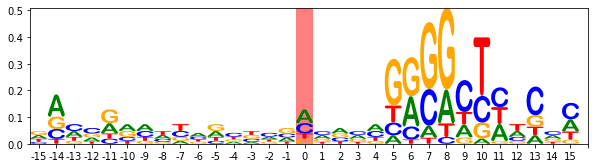

In [17]:
make_logo_info('experimental_insertions_seq_MG.fasta', 15)
plt.savefig('logo_IS150_experimental.png', dpi = 300)